<a href="https://colab.research.google.com/github/sharadnatarajSJSU/Eluvio/blob/main/Eluvio_carl_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import random


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_folder='/content/drive/MyDrive/SJSU assignment Docs/Eluvio Challange/Train'
test_folder = '/content/drive/MyDrive/SJSU assignment Docs/Eluvio Challange/Test'

In [4]:
classes = ['Acura',
 'Audi',
 'BMW',
 'Chevrolet',
 'Ford',
 'Honda',
 'Hyundai',
 'Infiniti',
 'KIA',
 'Lamborghini',
 'Lexus',
 'Mazda',
 'MercedesBenz',
 'Nissan',
 'Porsche',
 'Tesla',
 'Toyota',
 'Volkswagen']

In [5]:
class_dict = {'Acura': 0,
 'Audi': 1,
 'BMW': 2,
 'Chevrolet': 3,
 'Ford': 4,
 'Honda': 5,
 'Hyundai': 6,
 'Infiniti': 7,
 'KIA': 8,
 'Lamborghini': 9,
 'Lexus': 10,
 'Mazda': 11,
 'MercedesBenz': 12,
 'Nissan': 13,
 'Porsche': 14,
 'Tesla': 15,
 'Toyota': 16,
 'Volkswagen': 17}

In [6]:
def load_images_and_labels(data_path, cates): 
  X = []
  y = []
  i = 0
  for  cate in cates: 
    for img_name in os.listdir(data_path + '/'+ cate + '/'):
      i = i +1
      print(i)
      img = cv2.imread(data_path + '/' + cate + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(class_dict[cate])
  return X, y

In [7]:
X_train, y_train = load_images_and_labels(train_folder, classes)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:
X_test, y_test = load_images_and_labels(test_folder, classes)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105


In [9]:
keylist = list(class_dict.keys())

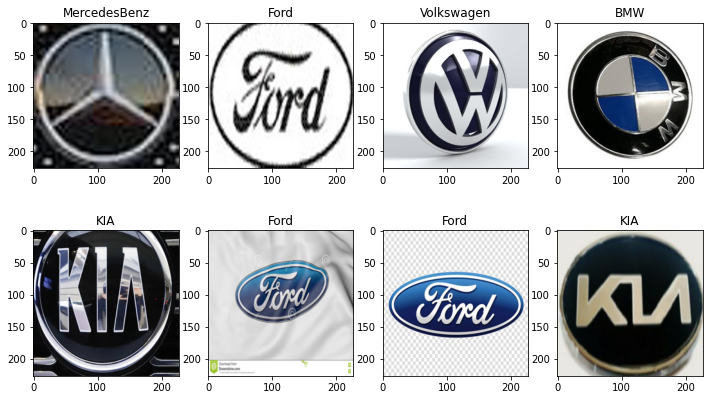

In [10]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(keylist[y_train[ind]])

In [11]:
from tensorflow.keras.utils import to_categorical

def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)
  y = np.array(y)

  y = to_categorical(y)
  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization 
  X = X/255.0
  
  return X, y

In [12]:
(X_train, y_train) = preprocess_data(X_train, y_train)
(X_test, y_test) = preprocess_data(X_test, y_test)

Splitting data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [15]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import gradient_descent_v2,adam_v2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras.regularizers import l2
from keras.initializers import RandomNormal, VarianceScaling

In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3),
                 input_shape=(227,227,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
model.add(Dropout(0.5))

# final activation is softmax, tuned to the number of classes/labels possible
model.add(Dense(18, activation='softmax'))

Augmentation

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
datagen = ImageDataGenerator(
    # featurewise_center=False,
    # samplewise_center=False,
    # featurewise_std_normalization=True,
    # samplewise_std_normalization=True,
    # zca_whitening=True,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

In [19]:
sgd = gradient_descent_v2.SGD(lr=0.005, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])

# Let's look at the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [20]:
def train_model_with_aug(model, X_train, y_train, X_test, y_test, epochs,batch_size):

  
  
  it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  steps = X_train.shape[0]//batch_size
  history = model.fit_generator(it_train,epochs = epochs,
                                validation_data = (X_test, y_test), verbose = 1, 
                                )
  # Evaluating the model
  _,acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100))

  return history, acc

In [ ]:
history, acc = train_model_with_aug(model,X_train,y_train,X_val,y_val,epochs= 100,batch_size = 32)

In [22]:
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['categorical_accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_categorical_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()
  


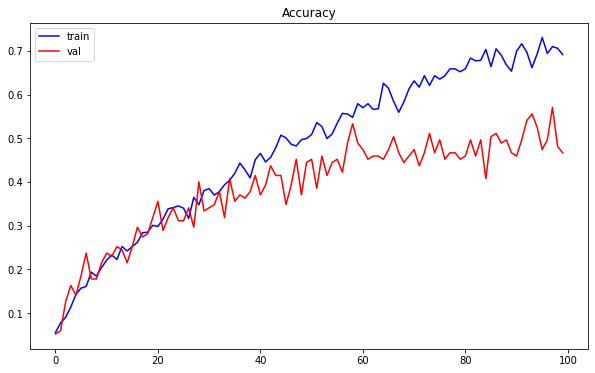

In [23]:
plot_accuracy(history)